

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
!pip install -U tensorflow==2.0.0 --quiet

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [117]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [118]:
pd.DataFrame(y_train).nunique()

0    10
dtype: int64

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [0]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train /= 255
x_test /= 255

In [123]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [125]:

    # Define model
    model1 = Sequential()

    # 1st Conv Layer
    model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model1.add(Activation('relu'))

    # 2nd Conv Layer
    model1.add(Convolution2D(32, 3, 3))
    model1.add(Activation('relu'))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(128))
    model1.add(Activation('relu'))

    # Prediction Layer
    model1.add(Dense(10))
    model1.add(Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model1
    model1.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test))
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.3715 - acc: 0.8660 - val_loss: 0.2805 - val_acc: 0.9014
Epoch 2/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.2287 - acc: 0.9165 - val_loss: 0.2607 - val_acc: 0.9048
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1673 - acc: 0.9378 - val_loss: 0.2742 - val_acc: 0.9049
Epoch 4/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1196 - acc: 0.9557 - val_loss: 0.2763 - val_acc: 0.9148
Epoch 5/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0817 - acc: 0.9695 - val_loss: 0.2897 - val_acc: 0.9149
Epoch 6/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0565 - acc: 0.9792 - val_loss: 0.3310 - val_acc: 0.9163
Epoch 7/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0396 - acc: 0.9858 - val_loss: 0.3

In [126]:
loss_and_metrics = model1.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 0s 50us/step
[0.4780556729733944, 0.9122]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [127]:

    # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Max Pooling
    model2.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model2.add(Dropout(0.25))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test))
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.3940 - acc: 0.8594 - val_loss: 0.3145 - val_acc: 0.8860
Epoch 2/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2582 - acc: 0.9061 - val_loss: 0.2820 - val_acc: 0.8972
Epoch 3/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.2115 - acc: 0.9218 - val_loss: 0.2375 - val_acc: 0.9117
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1753 - acc: 0.9345 - val_loss: 0.2534 - val_acc: 0.9115
Epoch 5/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1490 - acc: 0.9441 - val_loss: 0.2238 - val_acc: 0.9210
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1239 - acc: 0.9540 - val_loss: 0.2244 - val_acc: 0.9241
Epoch 7/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1107 - acc: 0.9581 - val_loss: 0.2438 -

In [128]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 50us/step
[0.2847382840484381, 0.924]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

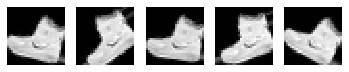

In [130]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [131]:

    # Define model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model3
    model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validat

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6216 - acc: 0.7725 - val_loss: 0.4607 - val_acc: 0.8351
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4352 - acc: 0.8400 - val_loss: 0.4231 - val_acc: 0.8526
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3870 - acc: 0.8574 - val_loss: 0.3753 - val_acc: 0.8675
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3528 - acc: 0.8708 - val_loss: 0.3679 - val_acc: 0.8741
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3328 - acc: 0.8781 - val_loss: 0.3269 - val_acc: 0.8837
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3131 - acc: 0.8848 - val_loss: 0.3309 - val_acc: 0.8801
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3040 - acc: 0.8885 - val_loss: 0.3096 - val_acc: 0.8907
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [132]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 51us/step
[0.301311632168293, 0.8954]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
# Already imported above

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [135]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [136]:
pd.DataFrame(Y_train).nunique()

0    10
dtype: int64

In [0]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)

In [0]:
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [140]:
print('--- THE DATA ---')
print('X_train shape:', x_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

--- THE DATA ---
X_train shape: (60000, 28, 28, 1)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

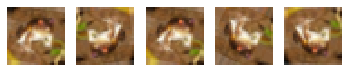

In [145]:
from matplotlib import pyplot as plt
gen1 = data_gen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen1.next().squeeze())
    plt.plot()
plt.show()